Let's find out what AirBnB data shows about my city of birth, Edinburgh!
The first stage is to import the data, eyeball it and think about what questions I might want to use it to answer.

In [1]:
## First of all, let's import some data, using pandas read csv
## https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
import pandas as pd
## these files are the summary files - where there were two files with the same name, I added "1" suffix to the summary versions
df_listings1 = pd.read_csv('listings1.csv')
df_neighbourhoods = pd.read_csv('neighbourhoods1.csv')
df_reviews1 = pd.read_csv('reviews1.csv')

## these files are the detailed files, I unzipped them first in Linux command line (see README)
df_cal = pd.read_csv('calendar.csv')
df_listings = pd.read_csv('listings.csv')
df_reviews = pd.read_csv('reviews.csv')

In [2]:
df_listings1.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,15420,Georgian Boutique Apt City Centre,60423,Charlotte,NaN,"Old Town, Princes Street and Leith Street",55.95759,-3.18805,Entire home/apt,100,3,345,2020-08-28,5.35,1,151
1,24288,"Cool central Loft, sleeps 4, 2 double bed+en-s...",46498,Gordon,NaN,"Canongate, Southside and Dumbiedykes",55.94383,-3.18445,Entire home/apt,95,3,219,2019-09-08,1.95,1,25
2,38628,Edinburgh Holiday Let,165635,Trish,NaN,Joppa,55.94215,-3.09640,Entire home/apt,55,4,57,2018-08-27,0.98,2,298
3,44009,"Very Spacious, Well Lit, Double Room, Very Cen...",192586,Puneet,NaN,Marchmont West,55.93800,-3.19468,Private room,45,2,38,2013-07-22,0.29,1,87
4,44552,Double room - spacious Leith flat,195950,Shaun,NaN,South Leith,55.96612,-3.17184,Private room,31,2,200,2019-09-12,1.68,2,75


In [3]:
df_neighbourhoods.head()

,neighbourhood_group,neighbourhood
0,NaN,Abbeyhill
1,NaN,Baberton and Juniper Green
2,NaN,Balerno and Bonnington Village
3,NaN,Balgreen and Roseburn
4,NaN,"Barnton, Cammo and Cramond South"


In [4]:
df_reviews1.head()

,listing_id,date
0,15420,2011-01-18
1,15420,2011-01-31
2,15420,2011-04-19
3,15420,2011-04-23
4,15420,2011-05-15


In [5]:
df_cal.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,2852317,2021-07-10,f,$40.00,$40.00,2,1125
1,170756,2021-07-10,f,$53.00,$53.00,2,180
2,170756,2021-07-11,f,$54.00,$54.00,1,180
3,170756,2021-07-12,f,$53.00,$53.00,1,180
4,170756,2021-07-13,f,$53.00,$53.00,1,180


In [6]:
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,15420,https://www.airbnb.com/rooms/15420,20210710030835,2021-07-10,Georgian Boutique Apt City Centre,"Stunning, impeccably refurbished spacious grou...","The neighbourhood is in the historic New Town,...",https://a0.muscache.com/pictures/cf69631f-4194...,60423,https://www.airbnb.com/users/show/60423,...,4.98,4.98,4.90,NaN,f,1,1,0,0,5.35
1,24288,https://www.airbnb.com/rooms/24288,20210710030835,2021-07-10,"Cool central Loft, sleeps 4, 2 double bed+en-s...",Upper level of duplex. Boho rustic-chic former...,It's all in the mix: Culture-museums and galle...,https://a0.muscache.com/pictures/3460007/88731...,46498,https://www.airbnb.com/users/show/46498,...,4.89,4.85,4.60,NaN,t,1,1,0,0,1.95
2,38628,https://www.airbnb.com/rooms/38628,20210710030835,2021-07-10,Edinburgh Holiday Let,Brunstane - Daiches Braes (close to Portobello...,Quiet and easy access to outside.,https://a0.muscache.com/pictures/d9885120-178e...,165635,https://www.airbnb.com/users/show/165635,...,4.87,4.84,4.84,NaN,t,2,2,0,0,0.98
3,44009,https://www.airbnb.com/rooms/44009,20210710030835,2021-07-10,"Very Spacious, Well Lit, Double Room, Very Cen...","Imagine living in a beautiful, well lit, very ...",The flat is very central. It is 2mins from the...,https://a0.muscache.com/pictures/35cda67b-f2a0...,192586,https://www.airbnb.com/users/show/192586,...,4.73,4.67,4.63,NaN,f,1,0,1,0,0.29
4,44552,https://www.airbnb.com/rooms/44552,20210710030835,2021-07-10,Double room - spacious Leith flat,Pleasant double room in 2 bedroom ground floor...,NaN,https://a0.muscache.com/pictures/454814/0e351a...,195950,https://www.airbnb.com/users/show/195950,...,4.84,4.58,4.72,NaN,f,2,0,2,0,1.68


In [7]:
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,15420,171793,2011-01-18,186358,Nels,My wife and I stayed at this beautiful apartme...
1,15420,176350,2011-01-31,95218,Gareth,Charlotte couldn't have been a more thoughtful...
2,15420,232149,2011-04-19,429751,Guido,I went to Edinburgh for the second time on Apr...
3,15420,236073,2011-04-23,420830,Mariah,This flat was incredible. As other guests have...
4,15420,263713,2011-05-15,203827,Linda,Fantastic host and the apartment was perfect. ...


Here are some potentially interesting questions I could answer using this data:<br>
How many properties are available to rent?<br>
How many hosts are letting them?<br>
Number of properties per host - are people just letting their flat while they are away(casual letting, pocket money)? or do some people own a load of properties to let out and make income from (small business, income stream)?<br>
What parts of the city have the most listings? (can I map this to show visually?)<br>
What's the most popular room type?<br>
What's the most popular min/max stays (advertised)?<br>
What price range are the listings - and how does this relate to neighbourhood/room type?<br>
Is there seasonality in Edinburgh bookings? (my gut says August and Hogmanay will be most popular times...) - does this link to pricing? (again, I'd expect peak times to be most expensive)<br>
What words are most commonly used to describe lettings (by hosts)?<br>
Do reviewers agree/what words do they use? - sentiment analysis? - should Air BnB have this as a tool for hosts/visitors? select properties based on certain words/themes e.g. trendy vs historical etc.<br>
If I had a property in Edinburgh, how would I price it? Can I build a predictive model that predicts price based on property listing details? -- should AirBnB have this as a tool for hosts?<br>
What is the range of review scores, and what influences score? Can I build a predictive model that predicts score based on property listing details? -- should AirBnB have a tool for hosts to help them improve their scores?<br>


In [14]:
df_listings1.describe(include='all')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,6.634000e+03,6634,6.634000e+03,6554,0.0,6634,6634.000000,6634.000000,6634,6634.000000,6634.000000,6634.000000,5566,5566.000000,6634.000000,6634.000000
unique,NaN,6555,NaN,1773,NaN,111,NaN,NaN,4,NaN,NaN,NaN,1115,NaN,NaN,NaN
top,NaN,Mono Suites - One Bedroom Suite,NaN,James,NaN,"Old Town, Princes Street and Leith Street",NaN,NaN,Entire home/apt,NaN,NaN,NaN,2020-01-02,NaN,NaN,NaN
freq,NaN,7,NaN,210,NaN,765,NaN,NaN,4375,NaN,NaN,NaN,101,NaN,NaN,NaN
mean,2.641679e+07,NaN,1.156050e+08,NaN,NaN,NaN,55.950456,-3.198222,NaN,144.704402,4.853482,56.100844,NaN,1.701010,12.283087,155.290473
std,1.465081e+07,NaN,1.169969e+08,NaN,NaN,NaN,0.015453,0.037759,NaN,523.968883,33.740421,89.226018,NaN,2.222943,33.322392,131.474545
min,1.542000e+04,NaN,3.629800e+04,NaN,NaN,NaN,55.858160,-3.418760,NaN,0.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000
25%,1.434876e+07,NaN,2.092327e+07,NaN,NaN,NaN,55.942475,-3.211848,NaN,55.000000,1.000000,2.000000,NaN,0.370000,1.000000,29.000000
50%,2.635944e+07,NaN,6.828647e+07,NaN,NaN,NaN,55.951005,-3.193375,NaN,85.000000,2.000000,19.000000,NaN,1.090000,2.000000,127.000000
75%,3.771678e+07,NaN,1.897102e+08,NaN,NaN,NaN,55.959930,-3.178385,NaN,133.000000,3.000000,74.000000,NaN,2.410000,5.000000,293.000000


In [22]:
df_listings1['id'].nunique() # how many unique listings are there? 6,634 - so data set is one row per listing

6634

In [23]:
df_listings1['host_id'].nunique() # belonging to 4,036 unique hosts

4036

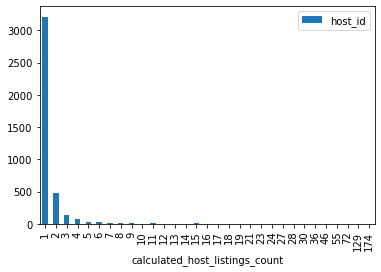

In [28]:
# let's chart how many listings per host, I expect most hosts only have one...
from matplotlib import pyplot as plt
listings_per_host = df_listings1[['host_id','calculated_host_listings_count']].groupby('calculated_host_listings_count').nunique()
listings_per_host.reset_index(drop=False, inplace=True)
listings_per_host.plot(x='calculated_host_listings_count', y='host_id', kind='bar')
plt.show()
# about three quarters of hosts only have one listing but there are a chunk with 2 and some outliers with over 100!
# come back to this and make it prettier

In [35]:
df_listings1[['neighbourhood','id']].groupby('neighbourhood').count().sort_values(by='id', ascending=False).head(10) # top 10 neighbourhoods are central, near tourist attractions (makes sense)

,id
neighbourhood,
"Old Town, Princes Street and Leith Street",765
Deans Village,392
Tollcross,334
Hillside and Calton Hill,247
Dalry and Fountainbridge,242
Meadows and Southside,228
New Town West,225
"Canongate, Southside and Dumbiedykes",224
New Town East and Gayfield,174


In [36]:
df_listings1[['neighbourhood','id']].groupby('neighbourhood').count().sort_values(by='id', ascending=False).tail(10) # bottom 10 also make sense
# some are out of town, areas I would describe as satellite villages rather than part of Edinburgh proper 
# some are less attractive neighbourhoods - fine to live in but not what a tourist would imagine when they think of Edinburgh

,id
neighbourhood,
Clovenstone and Wester Hailes,8
Colinton Mains and Firrhill,8
Liberton East,8
East Craigs North,8
Hyvots and Gilmerton,7
Queensferry West,6
Currie East,6
Carrick Knowe,6
"Barnton, Cammo and Cramond South",4


In [ ]:
# come back to mapping this later

In [45]:
df_listings1[['room_type']].value_counts(normalize=True) # c.two-thirds are the whole home/apt - wonder what "hotel room" means, do hotels advertise on AirBnB?
# Shared room is a low proportion, can't imagine they are popular, possibly very cheap though!

room_type      
Entire home/apt    0.659481
Private room       0.321224
Hotel room         0.015526
Shared room        0.003768
dtype: float64

In [47]:
df_listings1.isna().sum()

id                                   0
name                                 0
host_id                              0
host_name                           80
neighbourhood_group               6634
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       1068
reviews_per_month                 1068
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [49]:
df_listings1[['room_type','price']].groupby('room_type').mean() # yep, shared rooms are significantly cheaper
# Hotel Room most expensive so I guess these really are proper hotel rooms
# price differential between Entire Home and Private Room isn't as big as I might have expected? Maybe single rooms are more likely to be listed during the Festival when prices are likely to be higher?
# I can imagine aspiring comedians renting them during the Fringe, somewhere to stay while they wait to be "discovered"!

,price
room_type,
Entire home/apt,157.783314
Hotel room,259.116505
Private room,113.627874
Shared room,33.480000


In [51]:
df_listings1[['neighbourhood','price']].groupby('neighbourhood').mean().sort_values(by='price', ascending=False).head(10)
# more expensive areas are where you can rent a whole, big house as opposed to city centre flat?
# probably need to compare to room type too to make most learnings
# plus some areas possibly have outliers in price skewing the mean or a low number of properties could also skew

,price
neighbourhood,
Boswall and Pilton,671.896552
The Calders,474.500000
Broughton South,404.042683
South Gyle,351.400000
Western Harbour and Leith Docks,339.871795
New Town West,248.960000
Deans Village,220.778061
South Leith,194.373913
"Dalmeny, Kirkliston and Newbridge",184.047619


In [52]:
df_listings1[['neighbourhood','price']].groupby('neighbourhood').mean().sort_values(by='price', ascending=False).tail(10)

,price
neighbourhood,
Oxgangs,49.909091
Granton South and Wardieburn,49.750000
"Gracemount, Southhouse and Burdiehouse",48.642857
Muirhouse,48.066667
Mortonhall and Anwickhill,45.777778
"Jewel, Brunstane and Newcraighall",45.375000
Comiston and Swanston,44.000000
Niddrie,42.222222
Hyvots and Gilmerton,34.142857


In [54]:
#170756
df_cal[df_cal['listing_id']==170756] # are there 365 rows per listing id

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
1,170756,2021-07-10,f,$53.00,$53.00,2,180
2,170756,2021-07-11,f,$54.00,$54.00,1,180
3,170756,2021-07-12,f,$53.00,$53.00,1,180
4,170756,2021-07-13,f,$53.00,$53.00,1,180
5,170756,2021-07-14,f,$53.00,$53.00,1,180
...,...,...,...,...,...,...,...
361,170756,2022-07-05,f,$50.00,$50.00,1,180
362,170756,2022-07-06,f,$50.00,$50.00,1,180
363,170756,2022-07-07,f,$50.00,$50.00,1,180
364,170756,2022-07-08,f,$50.00,$50.00,2,180


In [62]:
df_cal.shape[0]/df_listings1.shape[0] # looks likely as number of rows in calendar table divided by number of listings = 365


365.0

In [69]:
df_cal[['available','listing_id']].groupby('available').count() # looks like available is set to t when property is available

,listing_id
available,
f,1390516
t,1030894


In [73]:
df_cal.dtypes # I want to use this table to look at the seasonality of pricing, but it looks like date and price are strings rather than the appropriate data types

listing_id         int64
date              object
available         object
price             object
adjusted_price    object
minimum_nights     int64
maximum_nights     int64
dtype: object

In [81]:
df_cal['date_fmt'] = pd.to_datetime(df_cal['date']).dt.strftime('%d-%m-%Y') # add formatted date field
df_cal['price_fmt'] = pd.to_numeric(df_cal['price'].str.replace('$','').str.replace(',','')) # add formatted price field
seasonality = df_cal[df_cal['available']=='t'].groupby('date_fmt').agg({'listing_id':'count','price_fmt':'mean'})

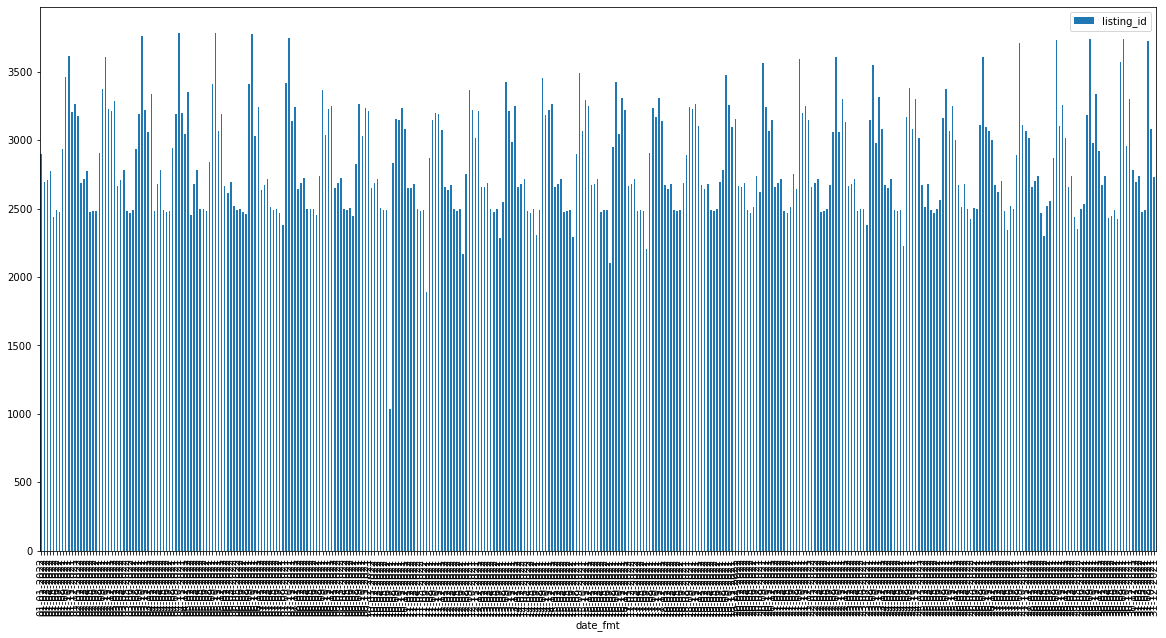

In [84]:
seasonality.reset_index(drop=False, inplace=True)
seasonality.plot(x='date_fmt', y='listing_id', kind='bar',figsize=(20,10))
plt.show()

In [ ]:
# :-D need to group by month or something so this makes sense!